In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geoscripts import gchemplots as gp

/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/mpltern/ternary/datasets.py:9: UserWarning: `mpltern.ternary.datasets.py` has been moved to `mpltern.datasets.py` and will be removed from the present directory in mpltern 0.6.0.
  warnings.warn(msg)
2024-04-02 11:44:19,254 pyrolite.util.plot.helpers - WARNING: scikit-learn not installed


In [2]:
# import data from Gale13
data = pd.read_excel('published/galeetal_supplementarytables_final.xlsx',sheet_name='5- Master TE-Iso Compilation.')

# isolate back-arc basins
bab_data = data[data['Seg Name'].astype(str).str.startswith('B')]

# Assign nan to empty cells
bab_data.replace(' ',np.nan,inplace=True)

# Save modified data
bab_data.to_csv('processed/data_gale.csv')


/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/tmp/ipykernel_896/637729766.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bab_data.replace(' ',np.nan,inplace=True)


<Axes: xlabel='$\\mathregular{SiO_2}$ (wt. %)', ylabel='$\\mathregular{Na{_2}O + K{_2}O}$ (wt. %)'>

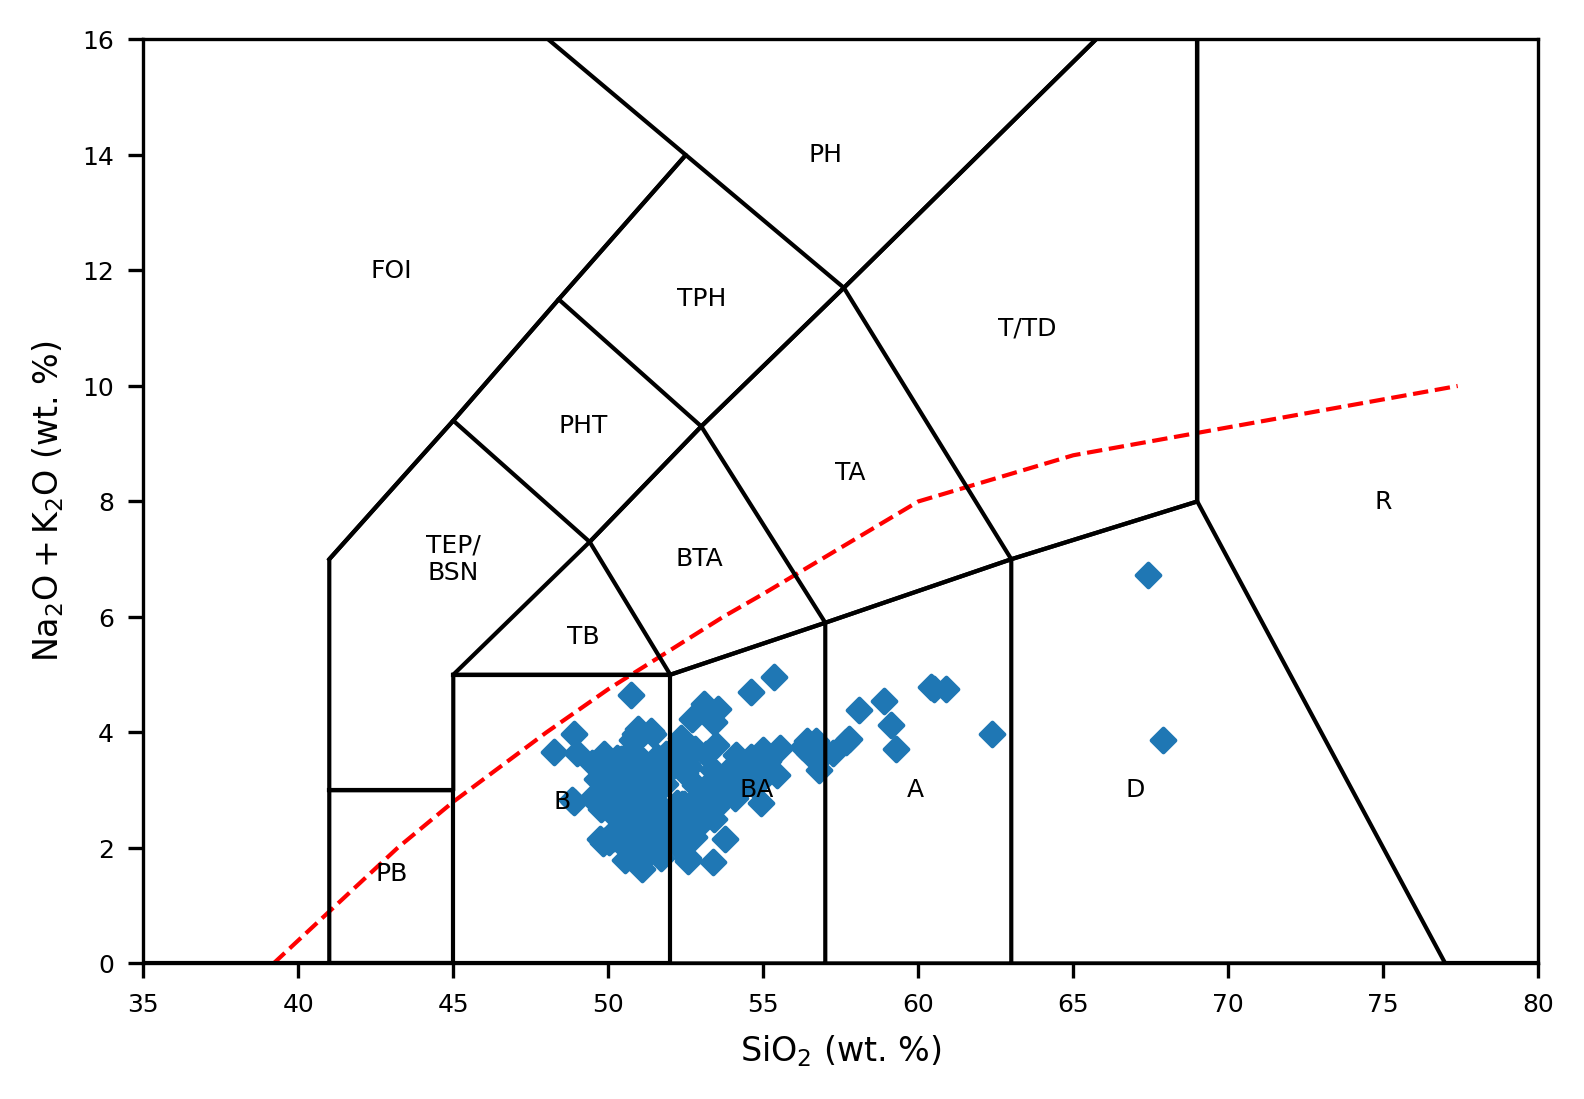

In [3]:
# Plot Majors
fig,ax = plt.subplots(1,dpi=300,figsize=(6,4))
SiO2,Na2O,K2O = bab_data[['SiO2','Na2O','K2O']].T.values.astype(float)
gp.TASsm(SiO2,Na2O,K2O,ax=ax,first=[])

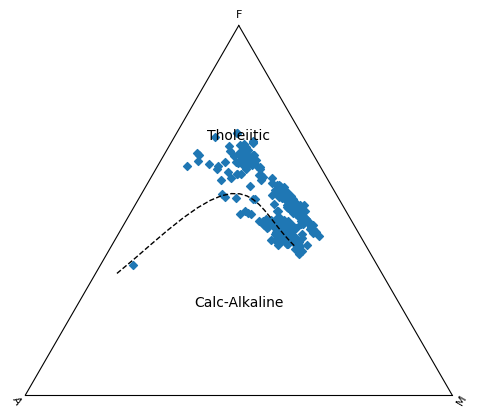

In [4]:
# AFM diagram
fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')

Na2O,K2O,MgO,FeOt = bab_data[['Na2O','K2O','MgO','FeOt']].T.values
gp.afm(Na2O=Na2O,K2O=K2O,MgO=MgO,FeOt=FeOt,ax=ax)

fig.savefig('afm_bab.pdf')

3
3


/home/dyvasey/git/geoscripts/geoscripts/gchemplots.py:459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(pti_ppm)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/git/geoscripts/geoscripts/gchemplots.py:519: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(pti_ppm)


<Axes: ylabel='Sample/Primitive Mantle'>

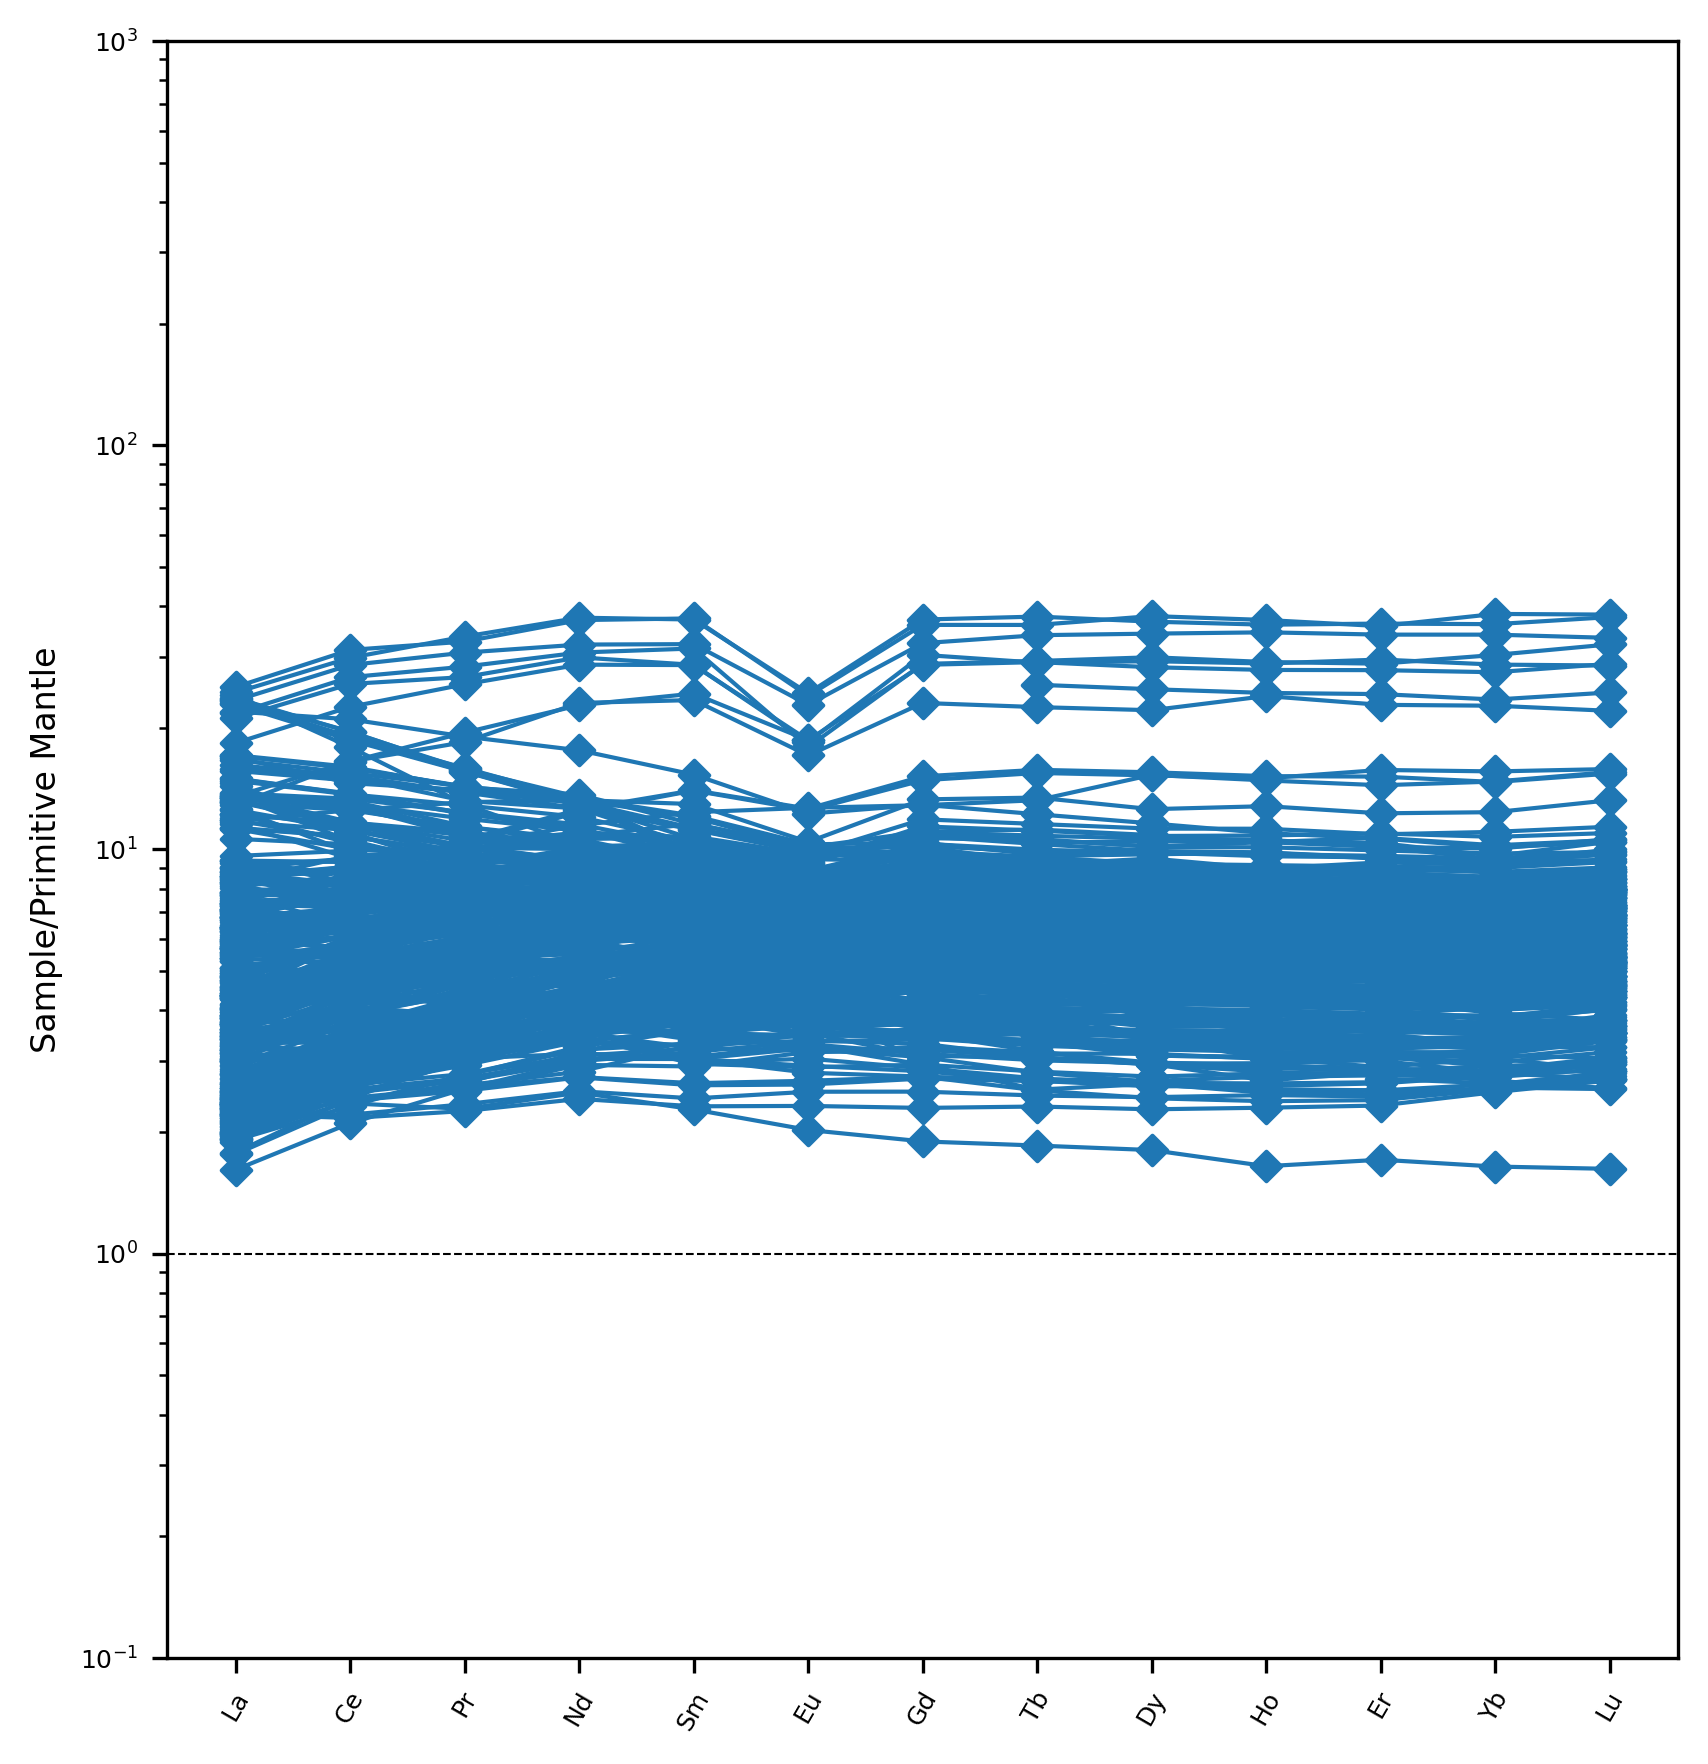

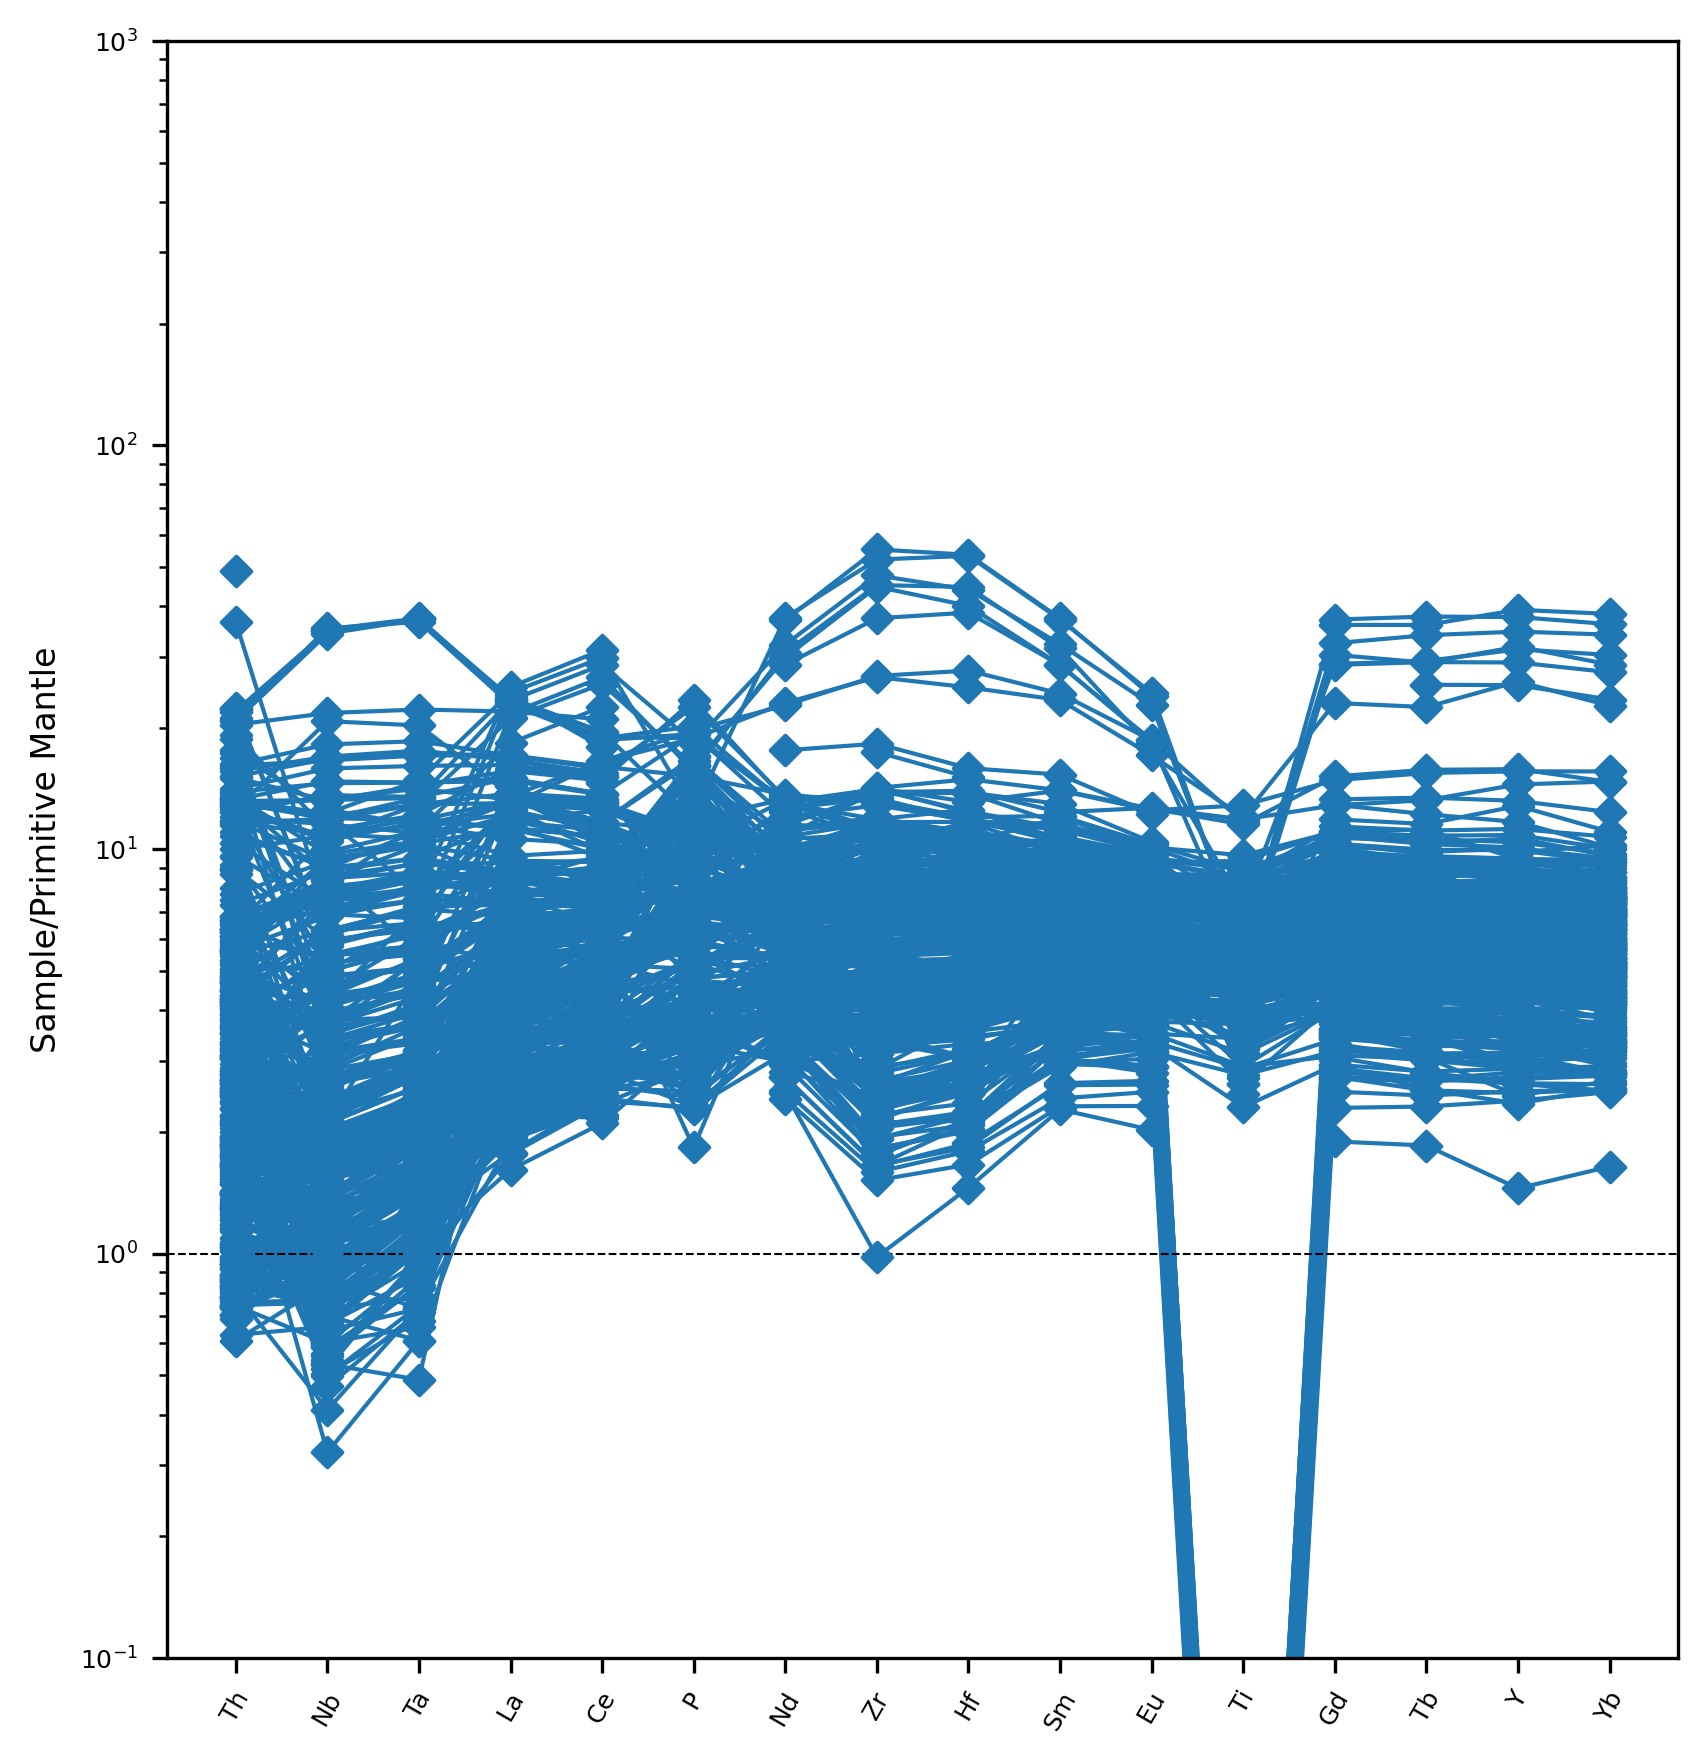

In [5]:
# Spiders
# Note, need to deal with Ti

fig0,ax0 = plt.subplots(1,figsize=(6.5,7),dpi=300)

fig1,ax1 = plt.subplots(1,figsize=(6.5,7),dpi=300)

gp.REE(bab_data,ax=ax0)
gp.immobile(bab_data,ax=ax1)

<TernaryAxes: tlabel='3Tb', llabel='Th', rlabel='2Ta'>

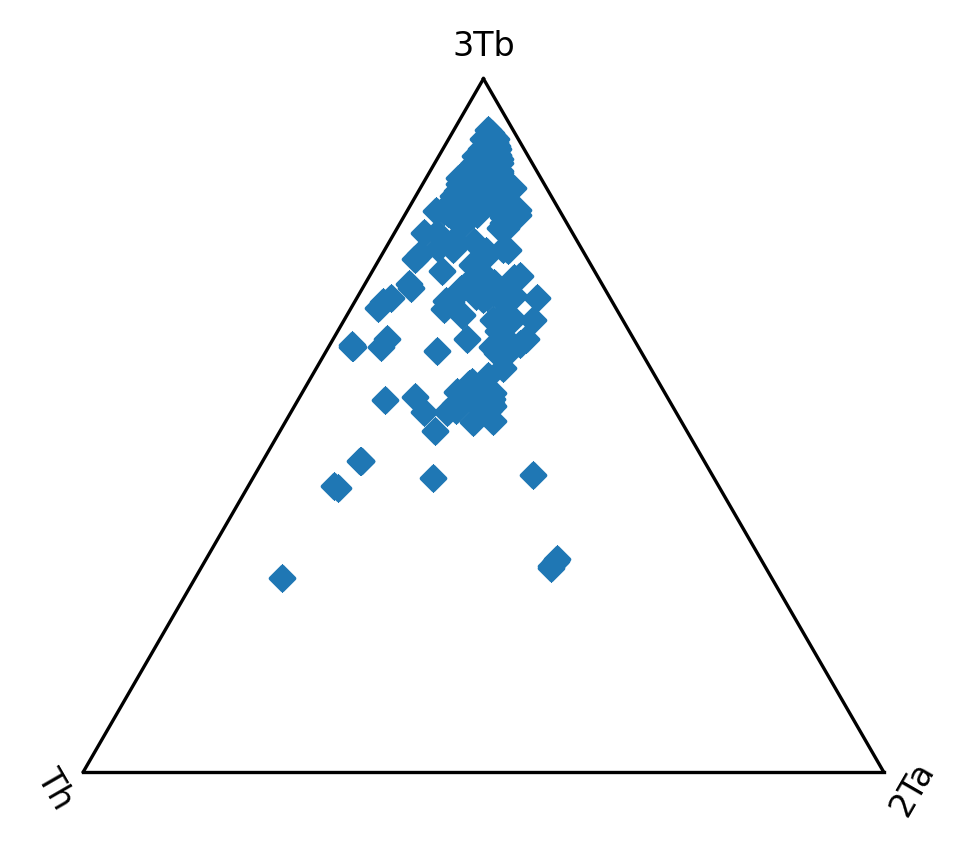

In [6]:
# Ternary
fig = plt.figure(figsize=(6.5,3),dpi=300)
ax = fig.add_subplot(111,projection='ternary')

Tb,Th,Ta = bab_data[['Tb','Th','Ta']].T.values
gp.cabanis(Tb,Th,Ta,ax=ax)